In [1]:
import numpy as np
import pandas as pd
import datetime
from pandas import Grouper
import os
from matplotlib import pyplot as plt
import seaborn as sns
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
db = pd.read_csv('dbdb.csv', 
                         sep=';',
                         on_bad_lines='skip',
                         names=["TICKER", "DATE", "SIGN", "ROBERTA", "VADERS", "ADJ_CLOSE", "HIGH", "VOLUME", "ADJ_CLOSE_NORM", "HIGH_NORM", "VOLUME_NORM", "TREND_CORRECT"],
                         skiprows=1)

#db['DATE'] = pd.to_datetime(db['DATE'], format='%Y-%M-%d')
db['DATE'] = pd.to_datetime(db['DATE'], errors='coerce')

df = db.reset_index()
db

,,TICKER,DATE,SIGN,ROBERTA,VADERS,ADJ_CLOSE,HIGH,VOLUME,ADJ_CLOSE_NORM,HIGH_NORM,VOLUME_NORM,TREND_CORRECT
693,2305880,A,2016-09-01,scorpio,0.797659,0.7992,0.021285,0.063578,-24.973160,0.310233,-0.163606,-0.819021,NaN
694,2305881,A,2016-09-02,scorpio,-0.174870,0.5994,0.021288,0.360013,13.244296,0.310233,-0.107079,-0.680532,NaN
695,2305883,A,2016-09-06,scorpio,-0.423575,-0.7579,-0.106377,-0.590839,2.555283,0.289482,-0.288395,-0.719266,NaN
696,2305884,A,2016-09-07,scorpio,-0.546921,0.4215,0.340787,0.127356,5.578753,0.362167,-0.151444,-0.708310,NaN
697,2305886,A,2016-09-08,scorpio,-0.462261,-0.0772,-0.191049,-0.021196,-42.816390,0.275718,-0.179771,-0.883679,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499760,1834702,ZYNE,2016-12-06,leo,-0.246660,0.7703,9.711682,4.571431,49.317073,-0.543567,-0.587971,-0.897368,NaN
3499761,1834705,ZYNE,2016-12-07,leo,-0.461272,0.3818,0.345783,0.136609,-39.268213,-0.647231,-0.635200,-0.963182,NaN
3499762,1834708,ZYNE,2016-12-08,leo,-0.278893,0.1531,7.029631,7.230562,74.771382,-0.573252,-0.559652,-0.878457,NaN
3499763,1834711,ZYNE,2016-12-09,leo,0.355984,0.6577,-2.962009,5.534350,7.510003,-0.683842,-0.577716,-0.928428,NaN


In [4]:
db = df
db = db.dropna()

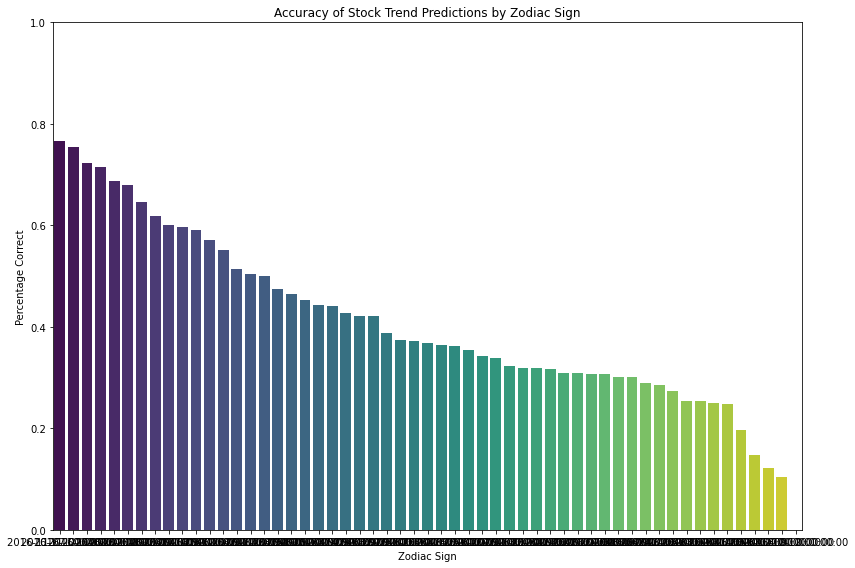

In [9]:
grouped = db.groupby('DATE')['TREND_CORRECT'].mean().reset_index()

# Sort the values (optional, but can make the visualization more informative)
grouped = grouped.sort_values('TREND_CORRECT', ascending=False)

# Create the bar chart
plt.figure(figsize=(12,8))
sns.barplot(x='DATE', y='TREND_CORRECT', data=grouped, palette='viridis')
plt.title('Accuracy of Stock Trend Predictions by Zodiac Sign')
plt.ylabel('Percentage Correct')
plt.xlabel('Zodiac Sign')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 since we're working with percentages

# Display the chart
plt.tight_layout()
plt.show()

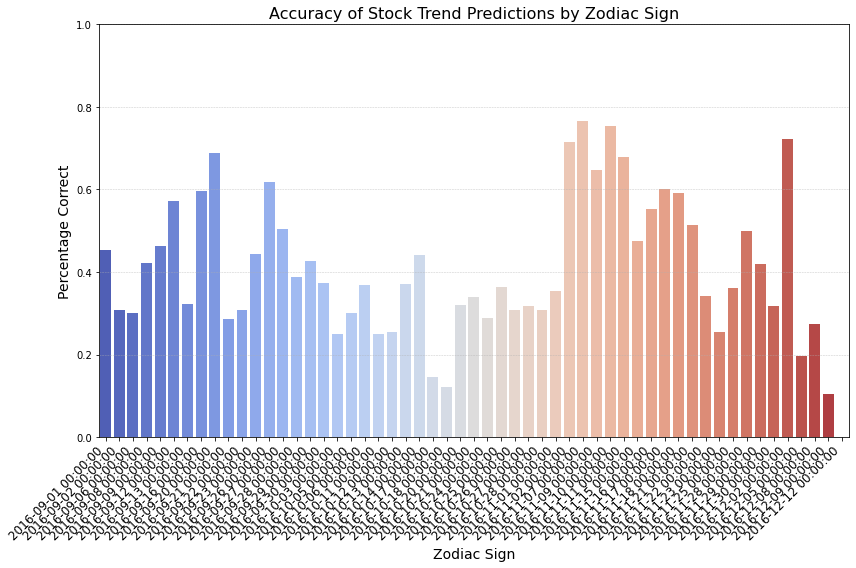

In [10]:
grouped = db.groupby('DATE')['TREND_CORRECT'].mean().reset_index()

# Create the bar chart with some aesthetic improvements
plt.figure(figsize=(12,8))

# Using a different color palette
sns.barplot(x='DATE', y='TREND_CORRECT', data=grouped, palette='coolwarm')

plt.title('Accuracy of Stock Trend Predictions by Zodiac Sign', fontsize=16)
plt.ylabel('Percentage Correct', fontsize=14)
plt.xlabel('Zodiac Sign', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 since we're working with percentages

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right", fontsize=12)

# Make the grid visible in the background for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()